Удельный расход топлива при номинальной мощности, г/кВт. ч = 208 - заявленные производителем технчиеские характеристики. Цифра показывает, сколько грамм топлива будет израсходовано двигателем за 1 час для выполнения работы, на которую нужно потратить 1 кВт мощности.
Максимальная скорость, км/ч - 43

Статистический метод позволяет определять нормы расхода топлива

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
from scipy.stats import pearsonr

sns.set()

df = pd.read_excel('db.xlsx')
df.head()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
0,2022-10-01,10,1,1035,228.500000,25.99,17.731667,152.283333,66.851789,575.0
1,2022-10-01,10,1,1037,214.818182,80.42,17.938182,125.609091,48.356601,1795.0
2,2022-10-01,10,1,1039,221.533333,73.36,16.754000,179.664286,70.469738,1688.0
3,2022-10-01,10,1,1040,229.466667,94.95,16.555333,NaN,NaN,1865.0
4,2022-10-01,10,1,1042,NaN,60.46,NaN,77.514286,47.216396,1519.0


In [2]:
df = df.dropna()
df.head()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
0,2022-10-01,10,1,1035,228.500000,25.99,17.731667,152.283333,66.851789,575.0
1,2022-10-01,10,1,1037,214.818182,80.42,17.938182,125.609091,48.356601,1795.0
2,2022-10-01,10,1,1039,221.533333,73.36,16.754000,179.664286,70.469738,1688.0
5,2022-10-01,10,1,1043,223.800000,95.28,18.466000,242.033333,5.008802,2181.0
7,2022-10-01,10,1,1345,222.625000,58.23,19.187500,111.506250,35.030529,1414.0


этот график (рассеяния) показывает взаимосвязь между двумя переменными

0.4771752208061695


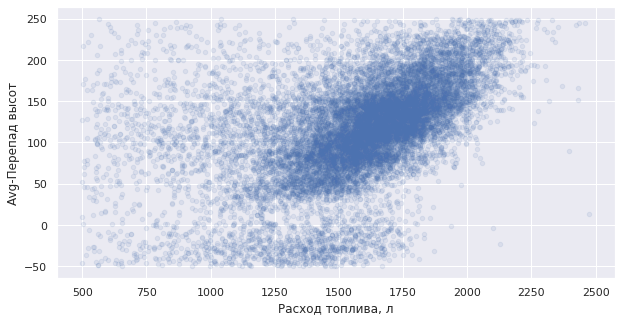

In [3]:
df.plot(x='Расход топлива, л', y='Avg-Перепад высот', kind='scatter', alpha=0.1, figsize=[10,5])
corr, p_value = pearsonr(df['Расход топлива, л'], df['Avg-Перепад высот'])
print(corr)

более плотное скопление точек в диапазоне 1500-1900 л показывает наличие взаимосвязи между показателями

0.03580358296448112


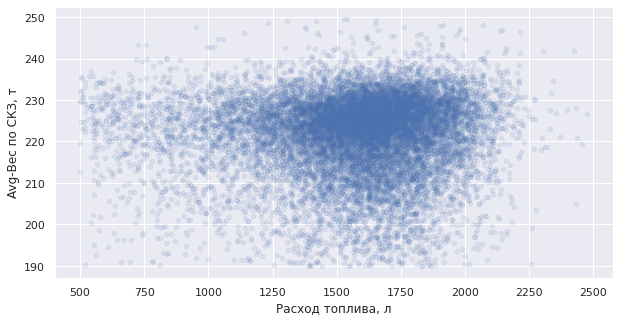

In [4]:
df.plot(x='Расход топлива, л', y='Avg-Вес по СКЗ, т', kind='scatter', alpha=0.1, figsize=[10,5])
corr, p_value = pearsonr(df['Расход топлива, л'], df['Avg-Вес по СКЗ, т'])
print(corr)

<Axes: xlabel='Расход топлива, л', ylabel='Sum-Расстояние, км'>

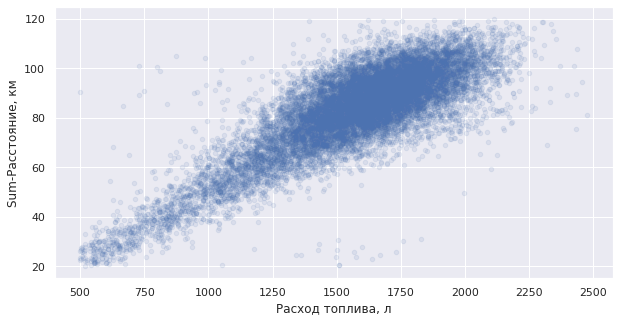

In [5]:
df.plot(x='Расход топлива, л', y='Sum-Расстояние, км', kind='scatter', alpha=0.1, figsize=[10,5])


<Axes: xlabel='Расход топлива, л', ylabel='Avg-Средняя скорость, км/ч'>

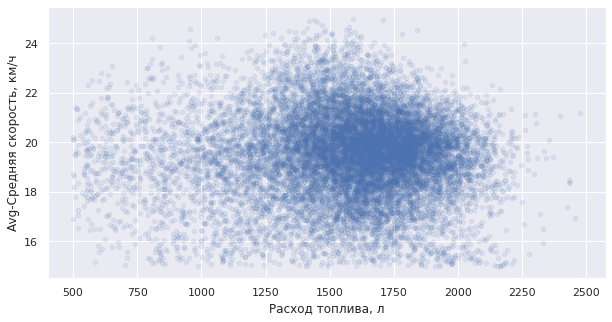

In [6]:
df.plot(x='Расход топлива, л', y='Avg-Средняя скорость, км/ч', kind='scatter', alpha=0.1, figsize=[10,5])

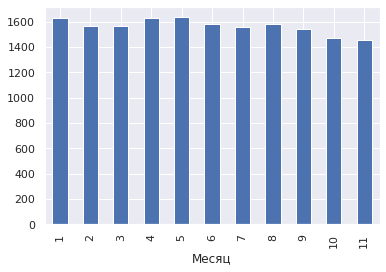

In [7]:
grouped_month = df.groupby(df['Месяц'])['Расход топлива, л'].mean()

grouped_month.plot(kind='bar')
plt.show()

распределение в целом равномерное. 
небольшое снижение расхода топлива в октябре и ноябре

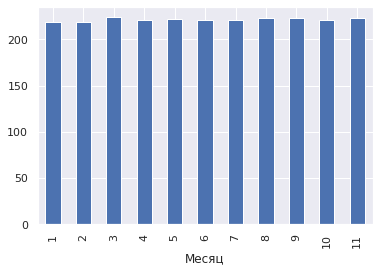

In [44]:
grouped_weight = df.groupby(df['Месяц'])['Avg-Вес по СКЗ, т'].mean()

grouped_weight.plot(kind='bar')
plt.show()

при этом средний вес по месяцам распределен равномерно, посмотрим, может быть в октябре-ноябре Белазы проезжали меньшее расстояние за смену

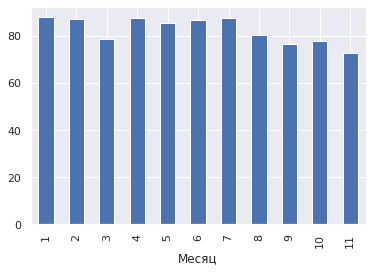

In [46]:
grouped_dist = df.groupby(df['Месяц'])['Sum-Расстояние, км'].mean()

grouped_dist.plot(kind='bar')
plt.show()

так и есть, при этом мы видим, что в марте пройденное расстояние за смену примерно соответствует октябрю, однако явного снижения расхода топлива в марте мы не наблюдаем. 

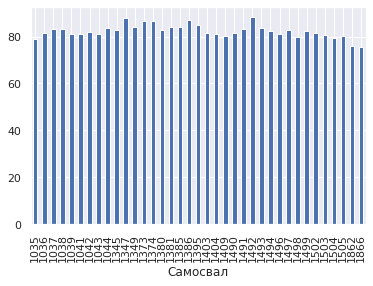

In [47]:
grouped_car = df.groupby(df['Самосвал'])['Sum-Расстояние, км'].mean()

grouped_car.plot(kind='bar')
plt.show()

! проверить на


In [75]:


df_1862.mean()
#[['Средний вес, т', 'Среднее расстояние, км', 'Средняя скорость, км/ч', 'Средний перепад высот', 'Средний расход топлива']]


,Дата для смены,Месяц,Смена,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
Самосвал,,,,,,,,,
1862,2022-10-27 18:43:54.146341376,10.439024,1.512195,215.501699,76.076341,20.389567,41.532036,45.340508,1262.121951


распределение в целом равномерное, однако очень заметно выделяются самосвалы 1862 и 1866

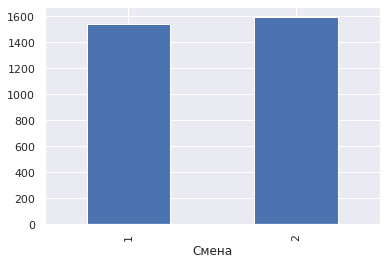

In [9]:
grouped_shift = df.groupby(df['Смена'])['Расход топлива, л'].mean()

grouped_shift.plot(kind='bar')
plt.show()

изменение расхода топлива в зависимости от смены не выявлено

хочется более подробно изучить распределение топлива

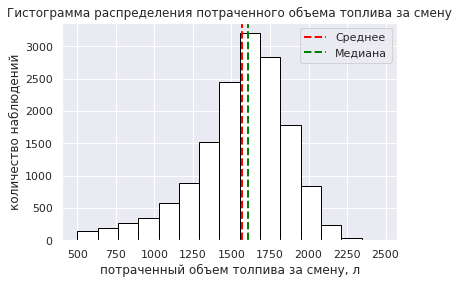

1608.0


In [10]:
fuel = df['Расход топлива, л'].dropna()
plt.hist(fuel, bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('потраченный объем толпива за смену, л')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения потраченного объема топлива за смену')
plt.axvline(fuel.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(fuel.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.legend()

plt.show()
print(fuel.median())

медианное значение расхода топлива = 1 608 л за смену

попробуем сгруппировать наши данные 

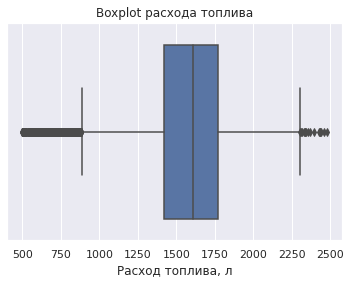

In [11]:
plt.figure(facecolor='white')
sns.boxplot(x=fuel)
plt.xlabel('Расход топлива, л')
plt.title('Boxplot расхода топлива')

plt.show()

график показывает явное наличие выбросов - это слишком маленькие или слишком большие значения нашего показателя. попробуем избавиться от выбросов.

In [12]:
def del_outliers(data):
    #посчитаю межквартильный размах: определю первый и третий квантили данных 
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    # определю границы выбросов: выбросы находятся на расстоянии 1,5 межквартильных рахмаха
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    res = data[(data >= lower_limit) & (data <= upper_limit)]
    return res

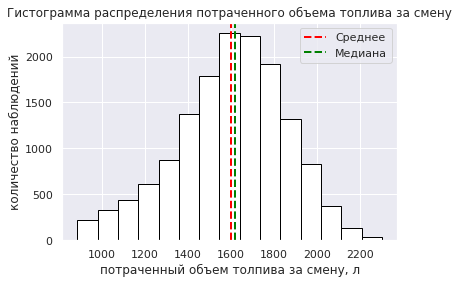

1620.0


In [17]:
plt.hist(del_outliers(df['Расход топлива, л']), bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('потраченный объем толпива за смену, л')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения потраченного объема топлива за смену')
plt.axvline(del_outliers(df['Расход топлива, л']).mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(del_outliers(df['Расход топлива, л']).median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.legend()

plt.show()
print(del_outliers(df['Расход топлива, л']).median())

<Axes: >

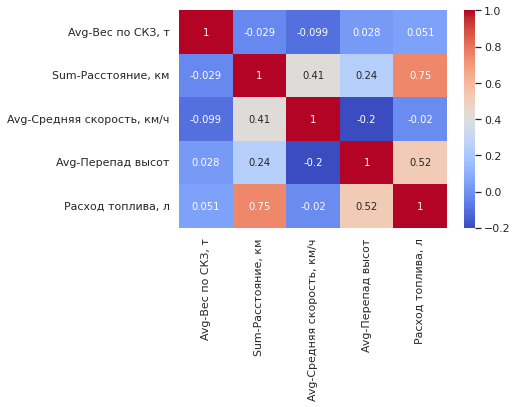

In [28]:
d_filt = del_outliers(df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']])
corr_filt = d_filt.corr()
sns.heatmap(corr_filt, annot=True, cmap='coolwarm')
#plt.savefig('/home/anya-mankova/emco/images/corr.png', dpi=80)

после удаления выбросов корреляция между признаками в целом не изменилась

In [30]:
d = {'Характеристика': pd.Series(['Средний вес, т', 'Среднее расстояние, км', 'Средняя скорость, км/ч', 'Средний перепад высот', 'Средний расход топлива']),
     'С выбросами': pd.Series([df['Avg-Вес по СКЗ, т'].mean(), df['Sum-Расстояние, км'].mean(), df['Avg-Средняя скорость, км/ч'].mean(), df['Avg-Перепад высот'].mean(), df['Расход топлива, л'].mean()]),
     'Без выбросов': pd.Series([d_filt['Avg-Вес по СКЗ, т'].mean(), d_filt['Sum-Расстояние, км'].mean(), d_filt['Avg-Средняя скорость, км/ч'].mean(), d_filt['Avg-Перепад высот'].mean(), d_filt['Расход топлива, л'].mean()])
}         

diff_df = pd.DataFrame(d)
diff_df

,Характеристика,С выбросами,Без выбросов
0,"Средний вес, т",221.621772,222.459261
1,"Среднее расстояние, км",82.892749,84.976735
2,"Средняя скорость, км/ч",19.485603,19.484160
3,Средний перепад высот,114.736675,119.784553
4,Средний расход топлива,1566.611696,1598.529284
